# Face Recoginition
1. OpenCV (Haar Cascades)
2. OpenCV (LBPH Face Recognizer)
3. Tensorflow (FaceNet)

## 1. OpenCV (Haar Cascades)

In [4]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))      

    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Convert img to RGB for displaying
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Detected Faces')
    plt.show()

    print(f'Number of faces detected: {len(faces)}')

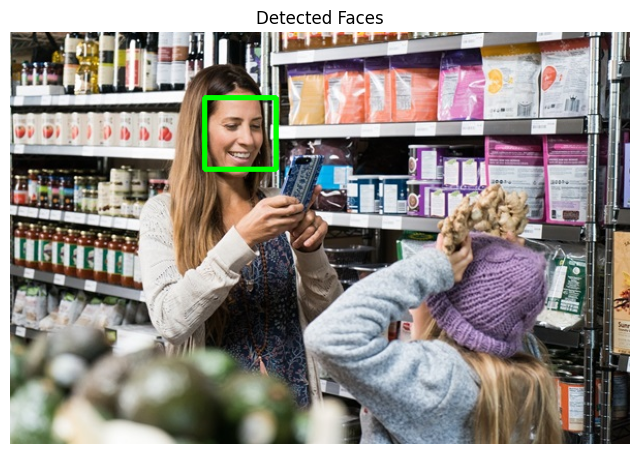

Number of faces detected: 1


In [6]:
detect_faces('store-camera-1.jpg')

## 2. OpenCV (LBPH Face Recognizer)

When to Use LBPH?

✅ If you don’t have a lot of data (LBPH works well with small datasets).<br>
✅ If you need a lightweight, fast solution (runs on low-power devices).<br>
✅ If you’re working with grayscale or low-resolution images.<br>

❌ If you need high accuracy, use deep learning models like FaceNet, VGGFace, or Dlib.

In [ ]:
def train_face_recognition():
    recognizer = cv2.face.LBPHFaceRecognizer_create()


## 3. Tensorflow (FaceNet)

Summary

✅ FaceNet converts faces into 128D embeddings<br>
✅ We use PCA & t-SNE to visualize them in 2D<br>
✅ Cosine similarity helps compare faces<br>
✅ Works well for face clustering, verification, and recognition<br> (compares similarity between 2 faces)<br>

In [7]:
from IPython import embed
import tensorflow as tf
import numpy as np
from keras_facenet import FaceNet

embedder = FaceNet()

def extract_face_embedding(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get face embbedings
    embeddings = embedder.embeddings([img])

    print(f'Embedding shape: {embeddings.shape}')
    print(f'Face embedding vector:\n{embeddings[0]}')

    return embeddings[0]

In [8]:
extract_face_embedding('store-camera-1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Embedding shape: (1, 512)
Face embedding vector:
[ 0.02172875 -0.08353025 -0.0659686   0.01917579 -0.03627232 -0.0062551
  0.0082946   0.03766591  0.02714858 -0.06232252 -0.04154938  0.02293963
 -0.03166972  0.04133539  0.04213198 -0.01178789  0.03284032 -0.00650229
  0.01557867 -0.02992474  0.0292303   0.0385293   0.04258292  0.01827696
 -0.04908775  0.00668073 -0.00381435  0.03794203 -0.00869821  0.02213268
 -0.04205188  0.01319847  0.02214466 -0.02271199 -0.00084744  0.02129459
 -0.06932119  0.05746837 -0.00022864 -0.05163799 -0.00227779  0.01721559
 -0.02387075 -0.06974237  0.01820782  0.005666    0.00802413 -0.01780275
 -0.0497108   0.00483856 -0.00927159  0.09156863  0.02925963 -0.03917947
 -0.11457921  0.01220792  0.01603287  0.08267246  0.09429845  0.08730678
 -0.0698083  -0.01663995  0.03448742 -0.00798471 -0.01384608  0.08480842
  0.00691024 -0.00881025 -0.00371713 -0.0104073  -0.08486331 -0.01484498
  0.12186993  0.00566968  0.02966907 -0.

array([ 0.02172875, -0.08353025, -0.0659686 ,  0.01917579, -0.03627232,
       -0.0062551 ,  0.0082946 ,  0.03766591,  0.02714858, -0.06232252,
       -0.04154938,  0.02293963, -0.03166972,  0.04133539,  0.04213198,
       -0.01178789,  0.03284032, -0.00650229,  0.01557867, -0.02992474,
        0.0292303 ,  0.0385293 ,  0.04258292,  0.01827696, -0.04908775,
        0.00668073, -0.00381435,  0.03794203, -0.00869821,  0.02213268,
       -0.04205188,  0.01319847,  0.02214466, -0.02271199, -0.00084744,
        0.02129459, -0.06932119,  0.05746837, -0.00022864, -0.05163799,
       -0.00227779,  0.01721559, -0.02387075, -0.06974237,  0.01820782,
        0.005666  ,  0.00802413, -0.01780275, -0.0497108 ,  0.00483856,
       -0.00927159,  0.09156863,  0.02925963, -0.03917947, -0.11457921,
        0.01220792,  0.01603287,  0.08267246,  0.09429845,  0.08730678,
       -0.0698083 , -0.01663995,  0.03448742, -0.00798471, -0.01384608,
        0.08480842,  0.00691024, -0.00881025, -0.00371713, -0.01